In [1]:
import math
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import re, nltk, spacy, gensim

# 문제1

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

AUC score with max_depth 2: 0.914
AUC score with max_depth 3: 0.922
AUC score with max_depth 4: 0.932
AUC score with max_depth 5: 0.940
AUC score with max_depth 6: 0.949
AUC score with max_depth 7: 0.954
AUC score with max_depth 8: 0.960
AUC score with max_depth 9: 0.962
AUC score with max_depth 10: 0.961
AUC score with max_depth 11: 0.962
AUC score with max_depth 12: 0.960
AUC score with max_depth 13: 0.961
AUC score with max_depth 14: 0.962
AUC score with max_depth 15: 0.961


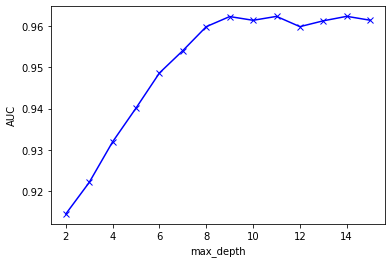

In [3]:
# 1
df = pd.read_csv('data/creditcard_sampled.csv')

x = df.drop('Class', axis=1)
y = df['Class']

score_list = []
I = range(2,16)

for i in I:
    tree_cv = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    scores = cross_val_score(tree_cv, x, y, scoring='f1', cv=5)
    score_list.append(scores.mean())
    print("AUC score with max_depth {}: {:.3f}".format(i,scores.mean()))
    
plt.plot(I, score_list, 'bx-')
plt.xlabel('max_depth')
plt.ylabel('AUC')
plt.show()

In [4]:
# 2
x = df.drop(['Time', 'Amount', 'Class'], axis=1)

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

pca = PCA(n_components = 0.95)
x_reduced = pca.fit_transform(x_scaled)

AUC score with max_depth 2: 0.903
AUC score with max_depth 3: 0.919
AUC score with max_depth 4: 0.927
AUC score with max_depth 5: 0.931
AUC score with max_depth 6: 0.945
AUC score with max_depth 7: 0.948
AUC score with max_depth 8: 0.955
AUC score with max_depth 9: 0.957
AUC score with max_depth 10: 0.954
AUC score with max_depth 11: 0.956
AUC score with max_depth 12: 0.959
AUC score with max_depth 13: 0.958
AUC score with max_depth 14: 0.952
AUC score with max_depth 15: 0.953


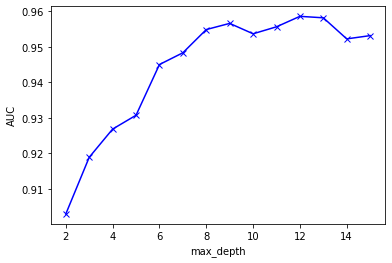

In [5]:
# 3
x_pca = pd.DataFrame(x_reduced)
x_pca['Time'] = df['Time']
x_pca['Amount'] = df['Amount']

score_list = []
I = range(2,16)

for i in I:
    tree_cv = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    scores = cross_val_score(tree_cv, x_pca, y, scoring='f1', cv=5)
    score_list.append(scores.mean())
    print("AUC score with max_depth {}: {:.3f}".format(i,scores.mean()))
    
plt.plot(I, score_list, 'bx-')
plt.xlabel('max_depth')
plt.ylabel('AUC')
plt.show()

### 문제1 - (4)
- 차원 축소 전 최고 성과: 9, 11, 14 (0.962)
- 차원 축소 후 최고 성과: 12 (0.959)
- 차원을 축소하기 전 최고 성과가 더 크다

# 문제2

In [6]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [7]:
# 1
df = pd.read_csv('data/Carseats.csv')

ord = {'Bad':0, 'Medium':0.5, 'Good':1}
df['ShelveLoc'] = df.ShelveLoc.map(ord)

df_clus = df.drop(['Urban', 'US'], axis=1)

df_clus.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education
0,9.50,138,73,11,276,120,0.0,42,17
1,11.22,111,48,16,260,83,1.0,65,10
2,10.06,113,35,10,269,80,0.5,59,12
3,7.40,117,100,4,466,97,0.5,55,14
4,4.15,141,64,3,340,128,0.0,38,13


In [8]:
# 2
scaler = MinMaxScaler()
df_clus = pd.DataFrame(scaler.fit_transform(df_clus))
df_clus.head()

,0,1,2,3,4,5,6,7,8
0,0.583897,0.622449,0.525253,0.379310,0.533066,0.574850,0.0,0.309091,0.875
1,0.689613,0.346939,0.272727,0.551724,0.501002,0.353293,1.0,0.727273,0.000
2,0.618316,0.367347,0.141414,0.344828,0.519038,0.335329,0.5,0.618182,0.250
3,0.454825,0.408163,0.797980,0.137931,0.913828,0.437126,0.5,0.545455,0.500
4,0.255071,0.653061,0.434343,0.103448,0.661323,0.622754,0.0,0.236364,0.375


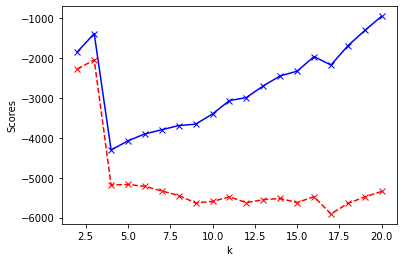

In [9]:
# 3
bic = list()
aic = list()

K = range(2,21)
for k in K:
    gm = GaussianMixture(n_components=k, n_init=10)
    gm.fit(df_clus)
    bic.append(gm.bic(df_clus))
    aic.append(gm.aic(df_clus))
    
plt.plot(K, bic, 'bx-')
plt.plot(K, aic, 'rx--')
plt.xlabel('k')
plt.ylabel('Scores')
plt.show()

- 최적의 군집의 수: 4

In [10]:
# 4
gm = GaussianMixture(n_components=4, n_init=10)
gm.fit(df_clus)

clus = gm.predict(df_clus)
unique, counts = np.unique(clus, return_counts=True)
dict(zip(unique, counts))

df_clus['Label'] = clus
df_clus.columns = df_clus.columns.get_level_values(0)
grouped = df_clus.groupby('Label')

In [11]:
grouped.count()

,0,1,2,3,4,5,6,7,8
Label,,,,,,,,,
0,219,219,219,219,219,219,219,219,219
1,96,96,96,96,96,96,96,96,96
2,47,47,47,47,47,47,47,47,47
3,38,38,38,38,38,38,38,38,38


In [12]:
grouped.mean()

,0,1,2,3,4,5,6,7,8
Label,,,,,,,,,
0,0.449083,0.490774,0.468198,0.225476,0.499803,0.548820,0.5,0.530095,0.491438
1,0.339454,0.479698,0.517572,0.214440,0.531647,0.540544,0.0,0.491856,0.494792
2,0.605422,0.496309,0.415861,0.277329,0.524112,0.585680,1.0,0.520309,0.715426
3,0.655436,0.498926,0.547049,0.224138,0.504008,0.533092,1.0,0.479426,0.164474


- 군집 특성: 거의 ShelveLoc 변수에 의해 군집이 형성되는 것을 알 수 있다

# 문제3

In [13]:
import nltk
import pyLDAvis
import pyLDAvis.sklearn

import sklearn.feature_extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [14]:
# 1
df = pd.read_csv('data/reviewContent_sampled.csv')
data = df.review.values.tolist()

# 빈도 기반 단어 문서 매트릭스 생성
vectorizer = CountVectorizer(analyzer='word',
                             min_df=5,
                             stop_words='english',
                             lowercase=True,
                             token_pattern='[a-zA-Z0-9]{2,}')

data_vectorized = vectorizer.fit_transform(data)


# 토픽 3개 LDA 실행
NUM_TOPICS = 3
lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS,
                                      max_iter=10,
                                      learning_method='online',
                                      random_state=100,
                                      batch_size=128,
                                      evaluate_every=-1,
                                      n_jobs=-1,)

lda_output = lda_model.fit_transform(data_vectorized)
log = lda_model.score(data_vectorized)
print(log)
per = lda_model.perplexity(data_vectorized)
print(per)

-660595.051134616
1240.082250670415


In [15]:
# 2
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=15) 
print(topic_keywords)

pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer)

[array(['place', 'pizza', 'just', 'good', 'like', 'food', 'don', 'best',
       'sauce', 've', 'time', 'really', 'new', 'eat', 'line'],
      dtype='<U15'), array(['delicious', 'good', 'dish', 'sauce', 'chicken', 'fried', 'pork',
       'like', 'salad', 'little', 'bread', 'fresh', 'cheese', 'ordered',
       'menu'], dtype='<U15'), array(['food', 'good', 'great', 'place', 'service', 'really', 'like',
       'wait', 'nice', 'restaurant', 'time', 'just', 'got', 'dinner',
       'came'], dtype='<U15')]


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.047277  0.099339       1        1  47.536175
0     -0.100413 -0.078063       2        1  29.362383
1      0.147690 -0.021276       3        1  23.101442, topic_info=            Term        Freq        Total Category  logprob  loglift
1802       pizza  395.000000   395.000000  Default  30.0000  30.0000
2089       sauce  409.000000   409.000000  Default  29.0000  29.0000
751         dish  273.000000   273.000000  Default  28.0000  28.0000
1010       fried  214.000000   214.000000  Default  27.0000  27.0000
331       brunch  268.000000   268.000000  Default  26.0000  26.0000
...          ...         ...          ...      ...      ...      ...
692   definitely   87.040298   379.097743   Topic3  -5.5059  -0.0061
1100       great   97.934291   897.703125   Topic3  -5.3880  -0.7503
1806       place   96.014682  1211.790538   Topic3  -5.4078  -1.0701
987         food   95.934427  1355.435728   Topic3  -5.4086  -1.1829
725         didn   77.979428   278.185392   Topic3  -5.6159   0.1934

[260 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
84        1  0.095072      ago
84        2  0.903181      ago
92        1  0.965728  akamaru
105       1  0.756837  amazing
105       2  0.155333  amazing
...     ...       ...      ...
2732      3  0.040806    years
2739      1  0.142042     york
2739      2  0.852253     york
2743      2  0.061450      yum
2743      3  0.921749      yum

[446 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])

- 각 토픽에 토픽명 붙이기
- Topic1: service
- Topic2: place
- Topic3: food

# 문제4
- 실제 프로젝트를 진행해보면 좋겠습니다